## Standard libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Import data

In [2]:
# This is the full dataset 
full_data = pd.read_excel("C:/Users/bodin/School/STAT 5001/project/gl_project_dataset.xlsx")
full_data.head()

,date,away_score,home_score,away_AB,away_H,away_2B,away_3B,away_HR,away_RBI,away_SH,...,home_SF,home_HBP,home_BB,home_IBB,home_K,home_SB,home_CS,home_GIDP,home_CI,home_LOB
0,20000329,5,3,33,12,1,0,2,5,1,...,1,0,3,0,4,0,0,1,0,8
1,20000330,5,1,37,6,2,0,1,5,1,...,0,0,6,1,9,0,0,2,0,10
2,20000403,0,2,31,6,2,0,0,0,1,...,0,1,1,0,6,1,0,1,0,6
3,20000403,3,3,22,7,1,0,0,2,0,...,0,0,1,0,4,0,0,0,0,2
4,20000403,4,6,35,10,2,2,1,4,0,...,0,1,1,0,7,1,0,1,0,8


In [3]:
# Reduce data to include only games from the year 2000+
data_reduced = full_data[full_data['date'] > 20000101]     #yyyymmdd

# Only include variables specified in write-up
data = data_reduced[['away_AB', 'away_H', 'away_2B', 'away_3B',
             'away_HR', 'away_SH', 'away_SF', 'away_HBP', 
             'away_BB', 'away_IBB', 'away_K', 'away_SB', 'away_CS', 
             'away_GIDP', 'away_CI', 'away_score', 
             'home_AB', 'home_H', 'home_2B', 'home_3B', 
             'home_HR', 'home_SH', 'home_SF', 'home_HBP', 
             'home_BB', 'home_IBB', 'home_K', 'home_SB', 'home_CS', 
             'home_GIDP', 'home_CI', 'home_score']]

In [4]:
# Ensure no 'na' values
data = data.dropna()

# Add singles column as specified in our write-up
data['away_1B'] = data['away_H'] - data['away_2B'] - data['away_3B'] - data['away_HR']
data['home_1B'] = data['home_H'] - data['home_2B'] - data['home_3B'] - data['home_HR']

In [5]:
# Combine away and home data columns
data2 = pd.DataFrame()

data2['AB'] = pd.concat([data['away_AB'], data['home_AB']], ignore_index=True)
data2['H'] = pd.concat([data['away_H'], data['home_H']], ignore_index=True)
data2['1B'] = pd.concat([data['away_1B'], data['home_1B']], ignore_index=True)
data2['2B'] = pd.concat([data['away_2B'], data['home_2B']], ignore_index=True)
data2['3B'] = pd.concat([data['away_3B'], data['home_3B']], ignore_index=True)
data2['HR'] = pd.concat([data['away_HR'], data['home_HR']], ignore_index=True)
data2['SH'] = pd.concat([data['away_SH'], data['home_SH']], ignore_index=True)
data2['SF'] = pd.concat([data['away_SF'], data['home_SF']], ignore_index=True)
data2['HBP'] = pd.concat([data['away_HBP'], data['home_HBP']], ignore_index=True)
data2['BB'] = pd.concat([data['away_BB'], data['home_BB']], ignore_index=True)
data2['IBB'] = pd.concat([data['away_IBB'], data['home_IBB']], ignore_index=True)
data2['K'] = pd.concat([data['away_K'], data['home_K']], ignore_index=True)
data2['SB'] = pd.concat([data['away_SB'], data['home_SB']], ignore_index=True)
data2['CS'] = pd.concat([data['away_CS'], data['home_CS']], ignore_index=True)
data2['GIDP'] = pd.concat([data['away_GIDP'], data['home_GIDP']], ignore_index=True)
data2['CI'] = pd.concat([data['away_CI'], data['home_CI']], ignore_index=True)
data2['SCORE'] = pd.concat([data['away_score'], data['home_score']], ignore_index=True)

In [6]:
# Split into input and output variables
X = data2.drop('SCORE', axis=1)
y = data2['SCORE']

In [7]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
# Standardize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
# Initialize Lasso
from sklearn.linear_model import Lasso
a = 0.001
lasso_model = Lasso(alpha = a)

In [28]:
# Train model
lasso_model.fit(X_train_scaled, y_train);

In [29]:
# Predictions using model
y_pred = lasso_model.predict(X_test_scaled)

In [30]:
# Evaluate model
from sklearn.metrics import mean_squared_error, accuracy_score
mse = mean_squared_error(y_test, y_pred)
score = lasso_model.score(X_test_scaled, y_test)     #r-squared
print(f"MSE: {mse}")
print(f"Score: {score}")

MSE: 2.273573255102066
Score: 0.7762801640597561


In [31]:
# Display coefficients
coefficients = pd.DataFrame({'Feature': range(1, X.shape[1] + 1), 'Coefficient': lasso_model.coef_})
print(coefficients)

    Feature  Coefficient
0         1    -0.413964
1         2     1.993855
2         3     0.000000
3         4     0.346810
4         5     0.209442
5         6     1.002085
6         7    -0.039145
7         8     0.263394
8         9     0.234061
9        10     0.710455
10       11    -0.094752
11       12    -0.064230
12       13     0.052333
13       14    -0.165515
14       15    -0.327413
15       16     0.030305


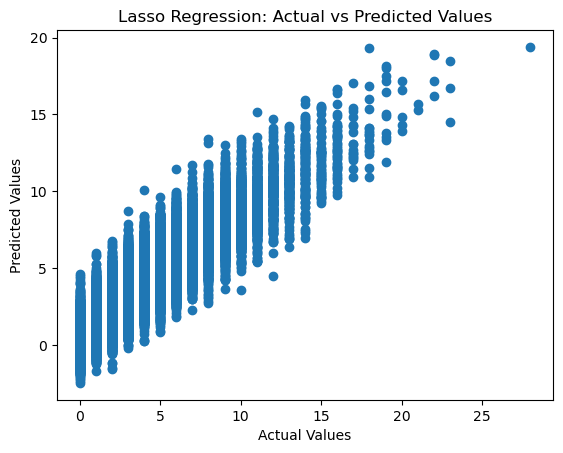

In [32]:
# Plot predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Lasso Regression: Actual vs Predicted Values')
plt.show()

### Use cross val to find best model

In [22]:
from sklearn.model_selection import GridSearchCV, KFold

lasso_model = Lasso()
cv = KFold(n_splits=5, shuffle=True, random_state=42)

param_grid = {
    'alpha': [.001, .01, .1, 1]
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [25]:
grid_search = GridSearchCV(lasso_model, param_grid, cv=kf, n_jobs=-1)
grid_search.fit(X, y)

C:\Users\bodin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.351e+04, tolerance: 1.102e+02
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1]})

In [26]:
best_params = grid_search.best_params_
best_rmse = np.sqrt(-grid_search.best_score_)
print(f'Best Parameters: {best_params}')
print(f'Best Cross-Validated RMSE: {best_rmse}')

Best Parameters: {'alpha': 0.001}
Best Cross-Validated RMSE: nan


C:\Users\bodin\AppData\Local\Temp\ipykernel_26832\1905331825.py:2: RuntimeWarning: invalid value encountered in sqrt
  best_rmse = np.sqrt(-grid_search.best_score_)
